# Sheet 3: Classification using SVMs

## Question 1 : Data preparation

### a) Load the olivetti faces dataset from sklearn. Set shuffle to be true. The dataset has 40 distinct classes with faces taken under different lighting, expressions, and facial details. The images are of size 64 * 64. <br> b) Use the data and target attributes to obtain the data and target vectors. Split the dataset such that the first 300 items belong to the train set and the last 100 belong to the test set. Here, we do not need to shuffle the data as it is already done while the dataset is being loaded. 

In [1]:
# Code here. You may add additional code and text cells if you need.
from sklearn.datasets import fetch_olivetti_faces

In [5]:
faces_dataset = fetch_olivetti_faces(shuffle = True)
data = faces_dataset.data
y = faces_dataset.target
print(data.shape)
print(y.shape)

(400, 4096)
(400,)


In [9]:
xtrain = data[:300,:]
ytrain = y[:300]
xtest = data[300:,:]
ytest = y[300:]

## Question 2: PCA

### a) Perform PCA using sklearn on the train set by varying the n_components among 20,40,70,100,140. Plot the number of components vs the amount of variance captured. <br> b) How do you think the performance of SVM will vary as the number of components is varied? (Comment in terms of overfitting on train set, generalization, accuracy on test set). 

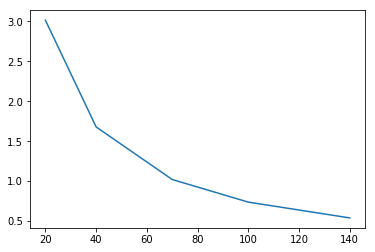

In [16]:
# Code here. You may add additional code and text cells if you need.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
n_c = [20,40,70,100,140]
pca_var = []
for i in n_c:
    data2 = PCA(n_components = i).fit_transform(data)
    #print(data2.shape)
    pca_var.append(data2.var())
    
plt.plot(n_c, pca_var)

- As the number of features increases the variance increases so the model has more parameters to fit the data which can lead to overfitting of the model.
- And having less features in the data can lead to underfitting of the data. 
- as the number of featues increases the training error decreases and the test error decreases to a certain point and then increases.

## Question 3: SVM

### a) Perform PCA on the train dataset using n_components = 70. <br> b) Perform SVM with C = 1, and kernel = 'rbf'. Report the score on the test set (after transformation using PCA) using SVC's inbuilt score function. <br> c) Report the confusion matrix using the predictions on the test set. 

In [18]:
# Code here. You may add additional code and text cells if you need.
data2 = PCA(n_components = 70).fit_transform(data)
xtrain = data2[:300,:]
xtest = data2[300:,:]
print(xtrain.shape)
print(xtest.shape)

(300, 70)
(100, 70)


In [20]:
from sklearn.metrics import confusion_matrix
model = SVC(C = 1, kernel = 'rbf')
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
print('test accuracy: ', model.score(xtest, ytest))


test accuracy:  0.92


In [21]:
print(confusion_matrix(ytest, pred))

[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 0]]


## Question 4: Cross validation

### Now take the entire original dataset that you initially downloaded (before you performed train test split, and before PCA - We will use all features and the entire dataset for this question). We will determine the parameters using cross validation. You will use the GridSearchCV in sklearn to perform cross validation. <br> a) To construct the parameter grid, use the rbf kernel. gamma should take values in {0.0001, 0.001, 0.01, 0.1, 1, 10} and C should take values in {0.001,0.01,0.1,1,10,100}. Set the number of folds for cross validation to 5. Report the best_parameters_, best_score_, best_estimator_. <br> b) Print out the attribute cv_results_. From cv_results_, what are the trends (based on accuracy score) as C and gamma increase? Also, state the reason for these trends (overfitting, underfitting, generalization). 

In [22]:
data = faces_dataset.data
y = faces_dataset.target

In [24]:
# Code here. You may add additional code and text cells if you need. 
from sklearn.model_selection import GridSearchCV
params = {'kernel': ['rbf'], 'gamma': [0.0001,0.001,0.01,0.1,1,10], 'C': [0.001,0.01,0.1,1,10,100]}
svm_model = SVC()
best_model = GridSearchCV(svm_model, params, cv = 5)
best_model.fit(data, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
best_model.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [27]:
best_model.best_score_

0.975

In [28]:
best_model.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
import pandas as pd
results_frams = pd.DataFrame(best_model.cv_results_)

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rohit Kumar\Anaconda3\lib\si

In [32]:
results_frams.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.404002,0.095585,0.171741,0.022297,0.001,0.0001,rbf,"{'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}",0.8625,0.8000,...,0.8350,0.025495,17,0.921875,0.906250,0.912500,0.928125,0.90625,0.915000,0.008705
1,1.398271,0.090681,0.180905,0.020324,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.8375,0.8125,...,0.8400,0.020000,13,0.921875,0.909375,0.915625,0.931250,0.91250,0.918125,0.007756
2,1.330843,0.039646,0.173157,0.020803,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.8625,0.8250,...,0.8700,0.029155,10,0.968750,0.959375,0.965625,0.978125,0.96875,0.968125,0.006060
3,1.345004,0.051791,0.158581,0.007153,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.4750,0.4625,...,0.4600,0.046368,28,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,1.336832,0.075400,0.187501,0.037746,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.3000,0.3375,...,0.2825,0.049117,31,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000


In [43]:
results_frams.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
31,1.469071,0.255001,0.189094,0.025338,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9500,0.9875,...,0.9725,0.014577,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
32,2.001248,0.079938,0.231182,0.008542,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9375,0.9750,...,0.9675,0.016956,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
33,1.998258,0.046859,0.240557,0.027243,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.6750,0.7750,...,0.7075,0.038406,25,1.0,1.0,1.0,1.0,1.0,1.0,0.0
34,1.982886,0.058112,0.221614,0.007004,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.2750,0.3000,...,0.2775,0.032016,33,1.0,1.0,1.0,1.0,1.0,1.0,0.0
35,2.034560,0.101654,0.232981,0.016752,100,10,rbf,"{'C': 100, 'gamma': 10, 'kernel': 'rbf'}",0.7750,0.8625,...,0.7775,0.044300,22,1.0,1.0,1.0,1.0,1.0,1.0,0.0


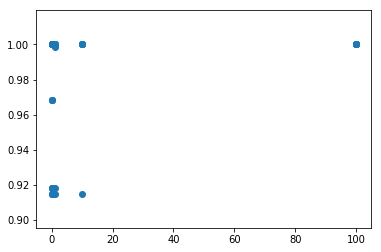

In [38]:
plt.scatter(results_frams['param_C'], results_frams['mean_train_score'])

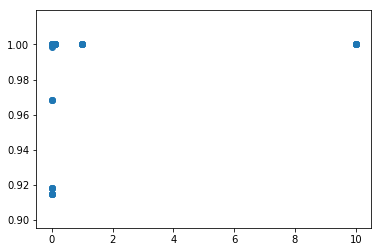

In [39]:
plt.scatter(results_frams['param_gamma'], results_frams['mean_train_score'])

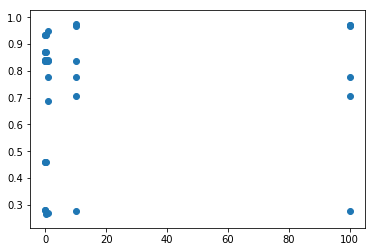

In [40]:
plt.scatter(results_frams['param_C'], results_frams['mean_test_score'])

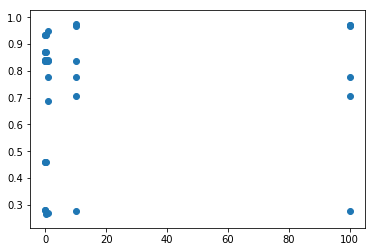

In [41]:
plt.scatter(results_frams['param_C'], results_frams['mean_test_score'])

- As the value of C and gamma increases the model the training accuracy increases and leads to overfitting of the data 
- As you can see from Results data frame that when C = 100 and gamma  = 10 the training error is one and test error is really low 0.7775.